# Jamboree Education - Linear Regression

Task:
   * To find the most relevant factors that are responsible for admission.
   * To build a model that will predict the chance of admission on the basis of those important factors

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
import warnings
warnings.filterwarnings('ignore')

In [224]:
df=pd.read_csv('jamboree_admission.csv')

In [225]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [227]:
df.shape

(500, 9)

In [228]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [229]:
df.loc[df.duplicated()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [230]:
%matplotlib inline

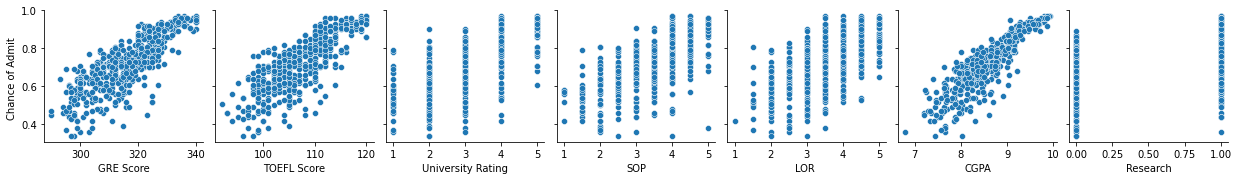

In [231]:
sns.pairplot(df,x_vars=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA', 'Research'],
             y_vars='Chance of Admit ')

GRE score, TOEFL score, CGPA show high positive correlation with chance of admit,
while University rating, SOP, LOR and Research shows less positive correlation with chance of admit

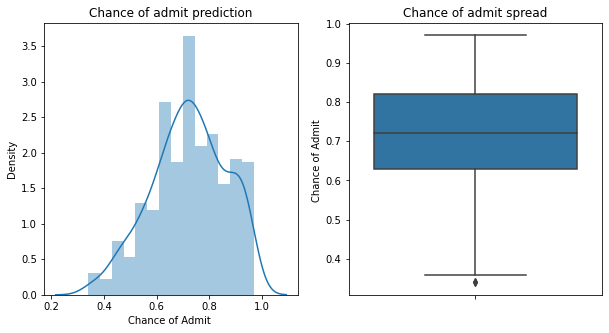

In [232]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Chance of admit prediction')
sns.distplot(df['Chance of Admit '])

plt.subplot(1,2,2)
plt.title('Chance of admit spread')
sns.boxplot(y=df['Chance of Admit '])

plt.show()

Inference:
* The plot seemed to be left-skewed, meaning that the most chances in the dataset are high.
* The data points are far spread out from the mean, which indicates a high variance in the Chance of Admit

<AxesSubplot:>

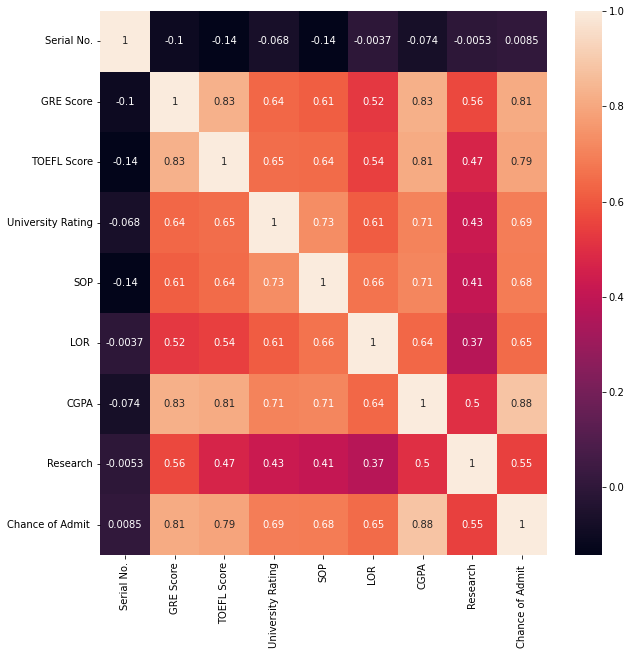

In [233]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True)

GRE Score, TOEFL score and CGPA are highly correlated with each other. This shows the chance of multicolearnity

<AxesSubplot:xlabel='TOEFL Score', ylabel='Density'>

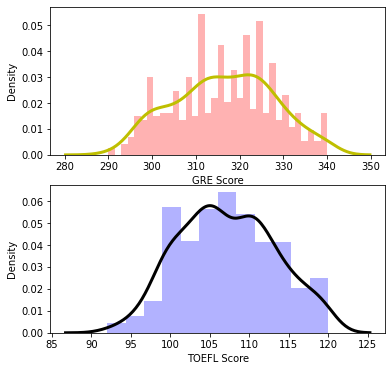

In [234]:
plt.figure(figsize=(6,6))
plt.subplot(2, 1, 1)
sns.distplot(df['GRE Score'],bins=34,color='Red',  kde_kws={"color": "y", "lw": 3, "label": "KDE"},
             hist_kws={"linewidth": 2,"alpha": 0.3 })
plt.subplot(2, 1, 2)
sns.distplot(df['TOEFL Score'],bins=12,color='Blue' ,kde_kws={"color": "k", "lw": 3, "label": "KDE"},
             hist_kws={"linewidth": 7,"alpha": 0.3 })

From the above 2 graphs its clear that people tend to score above 310 in GRE and above 100 in TOEFL

In [235]:
col = list(df.select_dtypes('number').columns)

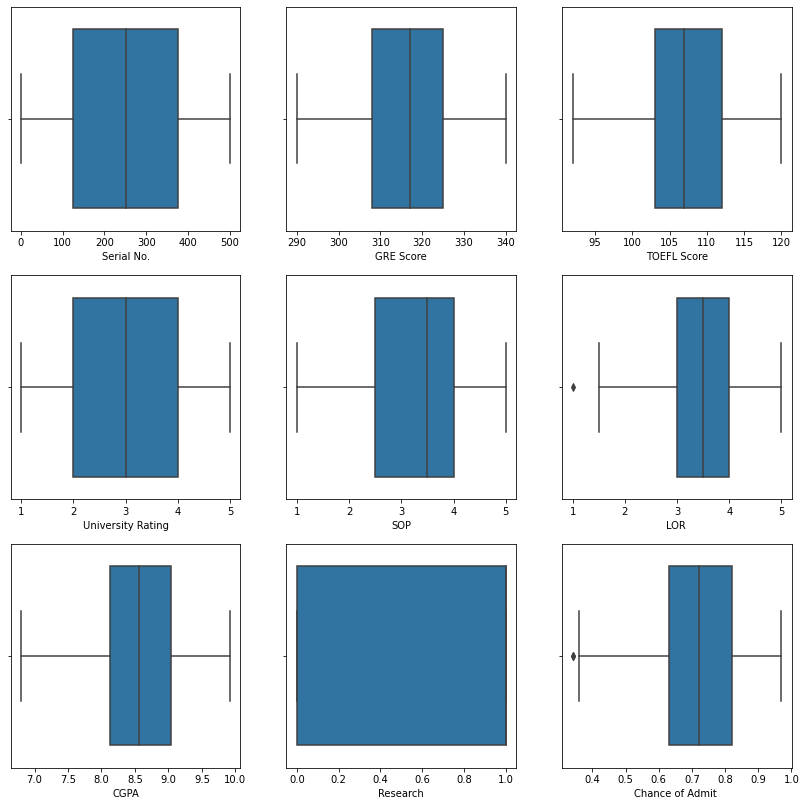

In [236]:
fig, axes = plt.subplots(3, 3, figsize=(14, 14))
k=0
for i in range(3):
    for j in range(3):
        sns.boxplot(ax=axes[i,j], x = df[col[k]])
        k+=1

LOR and Chance of admit have outlier, so removing the outlier

In [237]:
outliers = ['LOR ','Chance of Admit ']

In [238]:
for i,j in enumerate(outliers):
    q1=df[j].quantile(0.25)
    q3=df[j].quantile(0.75)
    iqr=q3-q1
    df=df[(df[j]>=q1-1.5*iqr)]

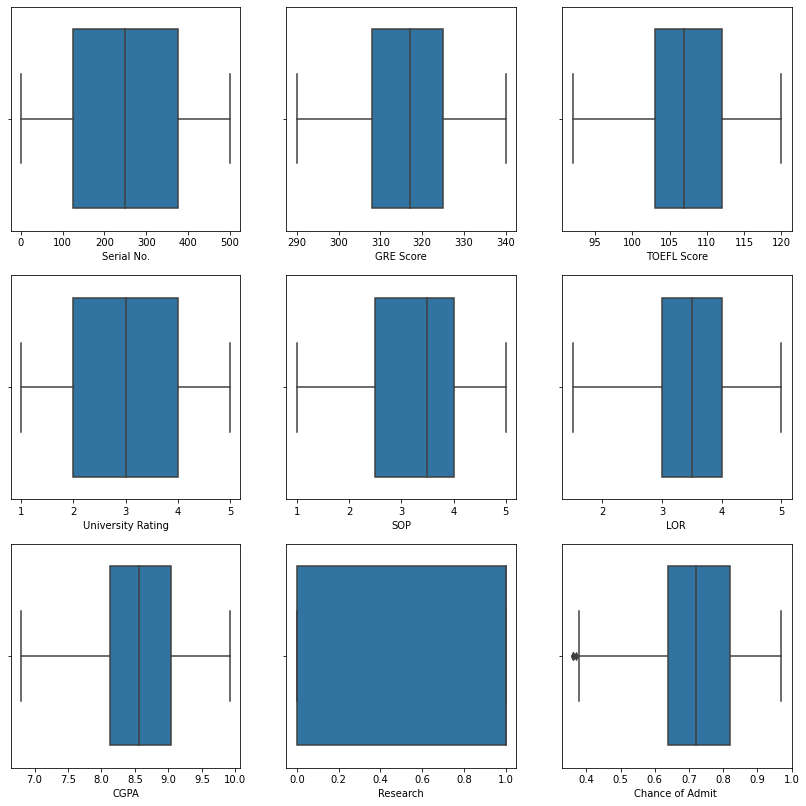

In [239]:
fig, axes = plt.subplots(3, 3, figsize=(14, 14))
k=0
for i in range(3):
    for j in range(3):
        sns.boxplot(ax=axes[i,j], x = df[col[k]])
        k+=1

Still there is outlier in Chance of admit

In [240]:
Q1 = df['Chance of Admit '].quantile(0.25)
Q3 = df['Chance of Admit '].quantile(0.75)
IQR = Q3-Q1
Q4=Q1-1.5*IQR
df=df[df['Chance of Admit ']>=Q1-1.5*IQR]


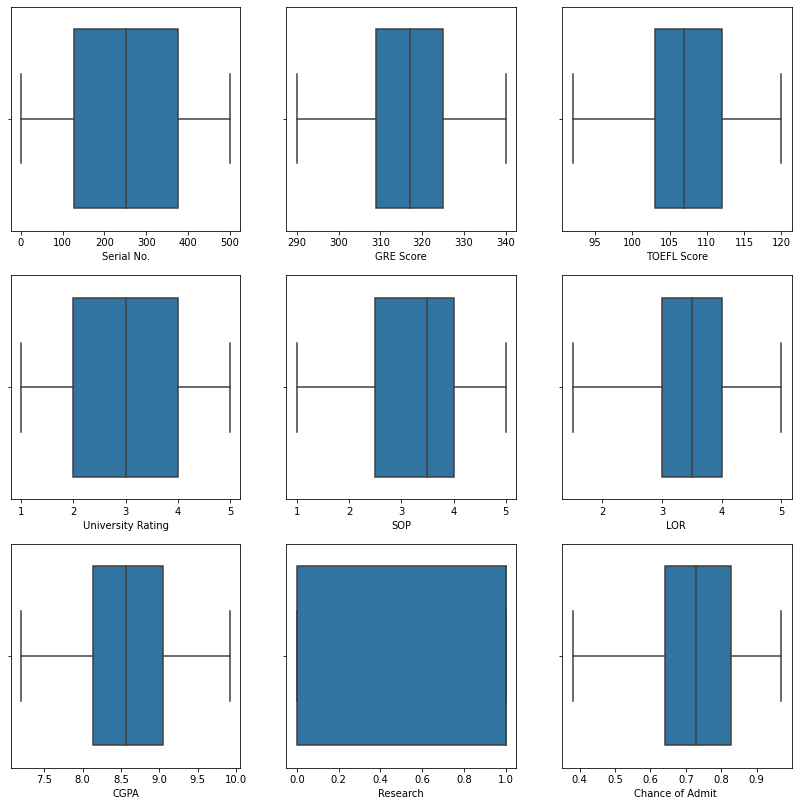

In [241]:
fig, axes = plt.subplots(3, 3, figsize=(14, 14))
k=0
for i in range(3):
    for j in range(3):
        sns.boxplot(ax=axes[i,j], x = df[col[k]])
        k+=1

# Normalizing the data 

In [242]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [243]:
df_x=df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']]

In [244]:
df_x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [245]:
df_x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


#  Splitting data into traing and testing using sklearn

In [246]:
from sklearn.model_selection import train_test_split

In [247]:
from sklearn.linear_model import LinearRegression

In [248]:
lr=LinearRegression()

In [249]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df['Chance of Admit '], train_size=0.7, random_state=100)

In [250]:
y_test.shape

(149,)

In [251]:
y_train = list(y_train)

In [252]:
x_train = scaler.fit_transform(x_train)

In [253]:
x_test = scaler.transform(x_test)

In [254]:
x_train = pd.DataFrame(x_train, columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research'])

In [255]:
x_test = pd.DataFrame(x_test, columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research'])

# Checking Most important feature using RFE(recursive feature elimination)

In [256]:
from sklearn.feature_selection import RFE

In [257]:
rfe = RFE(lr, n_features_to_select=4)

In [258]:
rfe = rfe.fit(x_train, y_train)

In [259]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('GRE Score', True, 1),
 ('TOEFL Score', True, 1),
 ('University Rating', False, 4),
 ('SOP', False, 3),
 ('LOR ', True, 1),
 ('CGPA', True, 1),
 ('Research', False, 2)]

Top 5 important features are TOEFL score, UNiversity Ranking, LOR, CGPA, Research

# Fitting data set using Sklearn Liner Regression

In [260]:
lr.fit(x_train,y_train)

LinearRegression()

In [261]:
print('intercept is = ',lr.intercept_)
coeff_df = pd.DataFrame(lr.coef_,x_test.columns,columns=['Coefficient'])
coeff_df

intercept is =  0.4054999240167134


,Coefficient
GRE Score,0.069805
TOEFL Score,0.086222
University Rating,0.008182
SOP,0.023368
LOR,0.045810
CGPA,0.331713
Research,0.029673


# Testing our model

In [262]:
y_pred=lr.predict(x_test)

Text(0, 0.5, 'Sales')

<Figure size 432x288 with 0 Axes>

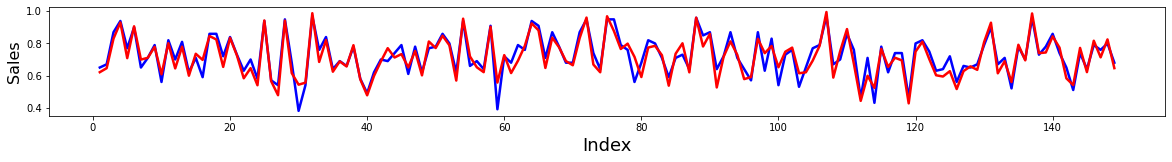

In [263]:
c = [i for i in range(1,150,1)] 
fig = plt.figure()
plt.figure(figsize=(20, 2))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")      #Actual values in blue
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")      #Predicted values in red
fig.suptitle('Actual and Predicted', fontsize=20)               
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Sales', fontsize=16)    

Text(0, 0.5, 'Predicted Y')

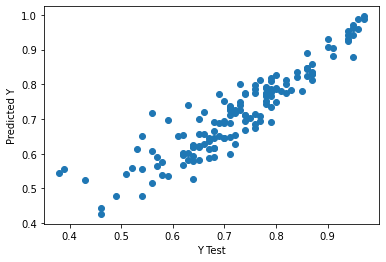

In [264]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

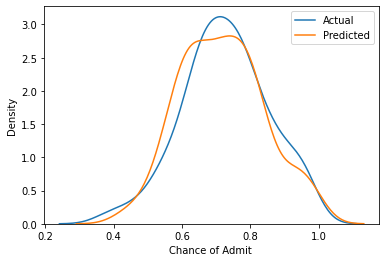

In [265]:
sns.kdeplot(y_test,label ='Actual')
sns.kdeplot(y_pred, label ='Predicted')
plt.legend()

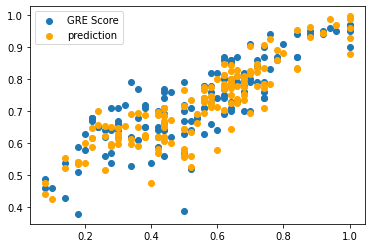

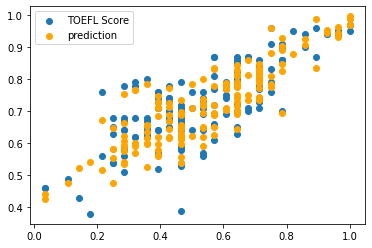

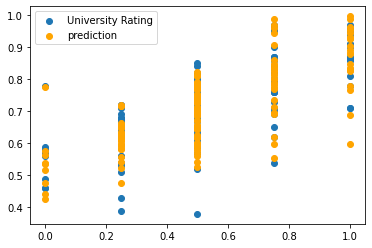

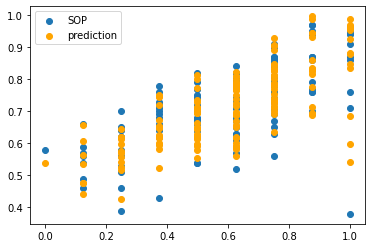

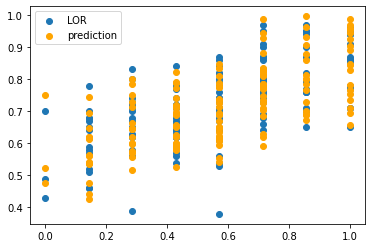

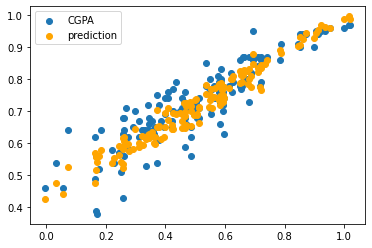

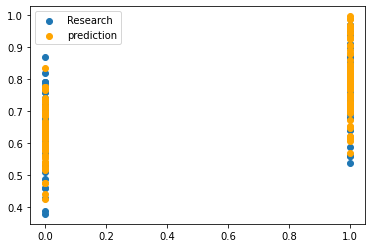

In [266]:
for i in x_test.keys():
    fig = plt.figure()
    plt.scatter(x_test[i],y_test,label=i)
    plt.scatter(x_test[i],y_pred,color='orange',label='prediction')
    plt.legend()
    plt.show()

Text(0, 0.5, 'ytest-y_pred')

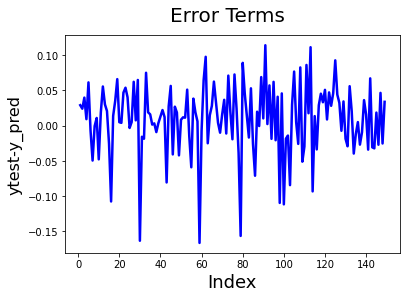

In [267]:
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-y_pred', fontsize=16)  

Text(0.5, 0, 'Errors')

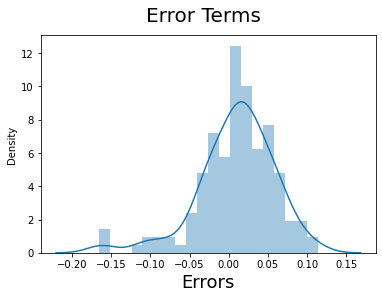

In [268]:
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled.

In [269]:
from sklearn.metrics import mean_squared_error, r2_score

In [270]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [271]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0024848674114887987
r_square_value : 0.8403441010075338


R^2 matric is 0.84 which means model will be correct more than 80% times

# Fitting data using STATSMODELS and finding VIF

In [272]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [286]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

# Model 1

In [279]:
x_train_new = build_model(x_train,y_train)
checkVIF(x_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     206.7
Date:                Sat, 21 Jan 2023   Prob (F-statistic):          7.67e-118
Time:                        08:46:17   Log-Likelihood:                 474.15
No. Observations:                 345   AIC:                            -932.3
Df Residuals:                     337   BIC:                            -901.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4055      0.01

,Features,VIF
0,GRE Score,30.49
5,CGPA,30.27
1,TOEFL Score,28.47
3,SOP,18.06
4,LOR,11.39
2,University Rating,10.84
6,Research,3.50


VIF of SOP is high and p-vale of SOP seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [280]:
x_train = x_train.drop(['SOP'], axis=1)

# Model 2

In [287]:
x_train_new = build_model(x_train,y_train)
checkVIF(x_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     240.9
Date:                Sat, 21 Jan 2023   Prob (F-statistic):          8.10e-119
Time:                        08:49:42   Log-Likelihood:                 473.60
No. Observations:                 345   AIC:                            -933.2
Df Residuals:                     338   BIC:                            -906.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4078      0.01

,Features,VIF
0,GRE Score,30.47
4,CGPA,28.90
1,TOEFL Score,27.62
3,LOR,9.98
2,University Rating,9.72
5,Research,3.49


VIF and p-vale of GRE Score seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [219]:
x_train = x_train.drop(['GRE Score'], axis=1)

# Model 3

In [220]:
x_train_new = build_model(x_train,y_train)
checkVIF(x_train)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     285.2
Date:                Sat, 21 Jan 2023   Prob (F-statistic):          4.24e-119
Time:                        08:42:04   Log-Likelihood:                 471.31
No. Observations:                 345   AIC:                            -930.6
Df Residuals:                     339   BIC:                            -907.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4102      0.01

,Features,VIF
3,CGPA,23.44
0,TOEFL Score,18.79
2,LOR,9.88
1,University Rating,9.72
4,Research,3.21


Inference :
R-sqaured and Adjusted R-squared (extent of fit)  0.812 and 0.809 - 80% variance explained.
F-stats and Prob(F-stats) (overall model fit) 296 and 2.83e-122(approx. 0.0) - Model fit is significant and explained 80% variance is just not by chance.
p-values and VIF for all the coefficients seem to be less than the significance level. Meaning that all the predictors are statistically significant

# Test for Homoscedasticity

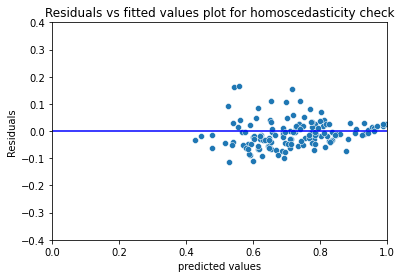

In [213]:
p = sns.scatterplot(x=y_pred,y=y_pred-y_test)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [215]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_pred-y_test, x_test)
lzip(name, test)

[('F statistic', 0.9935721824312123), ('p-value', 0.5102871433814266)]

Here null hypothesis is - error terms are homoscedastic and since p-values >0.05, we fail to reject the null hypothesis

Insights:
   * GRE Score, TOEFL score and CGPA are highly correlated with each other.
       This shows that student who has good GRE score will also have good TOEFL and CGPA score.
   * The important factor in Linear Regression are CGPA, Toefl Score, LOR, University Rating and Research
  
Recomendation:
   * In order to get into top colleges abroad one has to put more effort into Research as research is a main factor.
   * In order to get into top colleges abroad one has to put more effort CGPA
   * In order to get into top colleges abroad one must have good LOR
   * In order to get into top colleges abroad one should be in good college with high university ratings